# Bài toán 1: Xây dựng cây quyết định và rừng cây

## Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

### 1. Tải một số package mà chúng tôi sử dụng và package graphviz, để vẽ cây quyết định

In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 
import graphviz 

### 2. Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải quyết

In [5]:
df = pd.read_csv('data/data.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### 3. Chuẩn bị dữ liệu cho tập train và tập test

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

### 4. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [7]:
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 5. Hiển thị cây quyết định với package graphviz

In [8]:
dot_data = tree.export_graphviz(dt,
out_file=None,
filled=True,
rounded=True,
feature_names=\
features_response[:-1],
proportion=True,
class_names=['Not defaulted', 'Defaulted'])
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

### 1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu

In [9]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 
import graphviz 
df = pd.read_csv('data/data.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

### 2. Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu

In [10]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
error_score=np.nan,
return_train_score=True) # cv is the best model.
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


### 3. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\84794\AppData\Local\Temp\ipykernel_16376\1478637665.py:8: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE training scores')
C:\Users\84794\AppData\Local\Temp\ipykernel_16376\1478637665.py:12: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE testing scores')


Text(0, 0.5, 'ROC AUC')

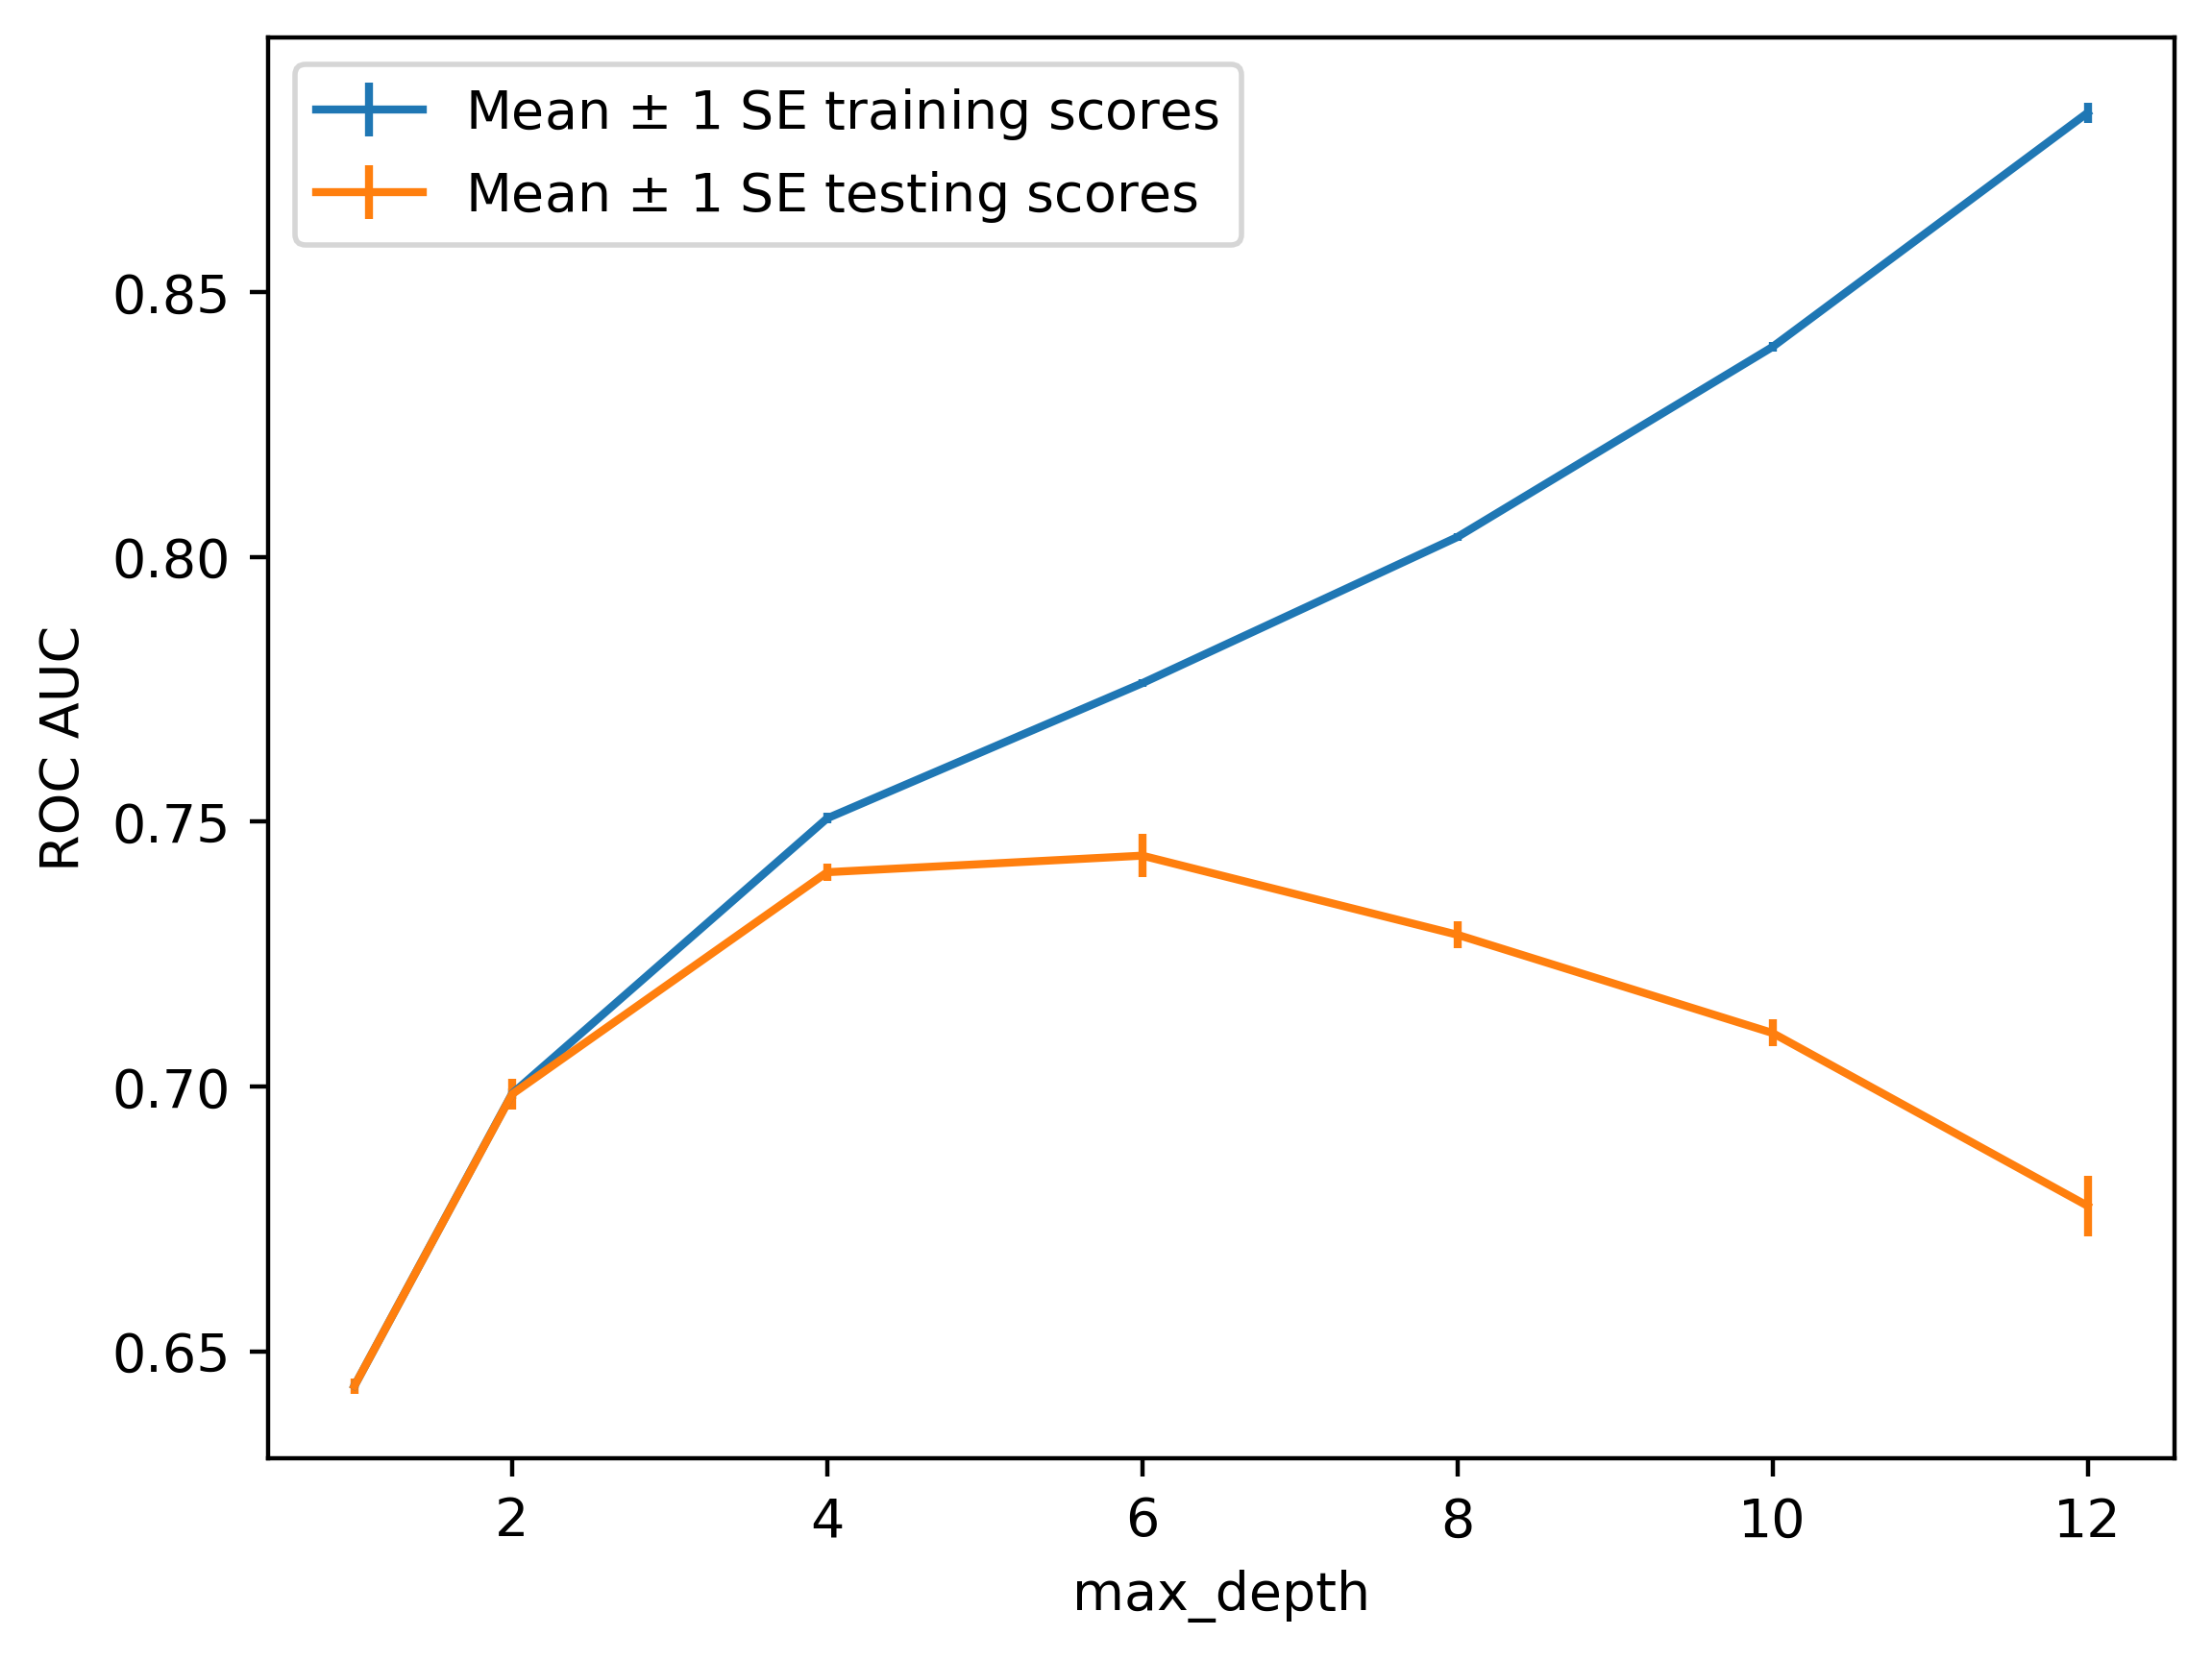

In [11]:
cv_results_df = pd.DataFrame(cv.cv_results_)
#View the names of the remaining columns in the results DataFrame
cv_results_df.columns
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_train_score'],
yerr=cv_results_df['std_train_score']/np.sqrt(4),
label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_test_score'],
yerr=cv_results_df['std_test_score']/np.sqrt(4),
label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

## Nhiệm vụ 3: Xây dựng rừng cây (random forest)

### 1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu

In [12]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 
import graphviz 
df = pd.read_csv('data/data.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

### 2. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

### 3. Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

In [15]:
#a parameter grid for this exercise in order to search the numbers of trees, ranging from 10 to 100 by 10s
rf_params_ex = {'n_estimators':list(range(10,110,10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
scoring='roc_auc', n_jobs=None,
refit=True, cv=4, verbose=1,
error_score= np.nan,
return_train_score=True)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestC...andom_state=4)
,param_grid,"{'n_estimators': [10, 20, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,60


### 4. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\84794\AppData\Local\Temp\ipykernel_16376\1889697650.py:12: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')


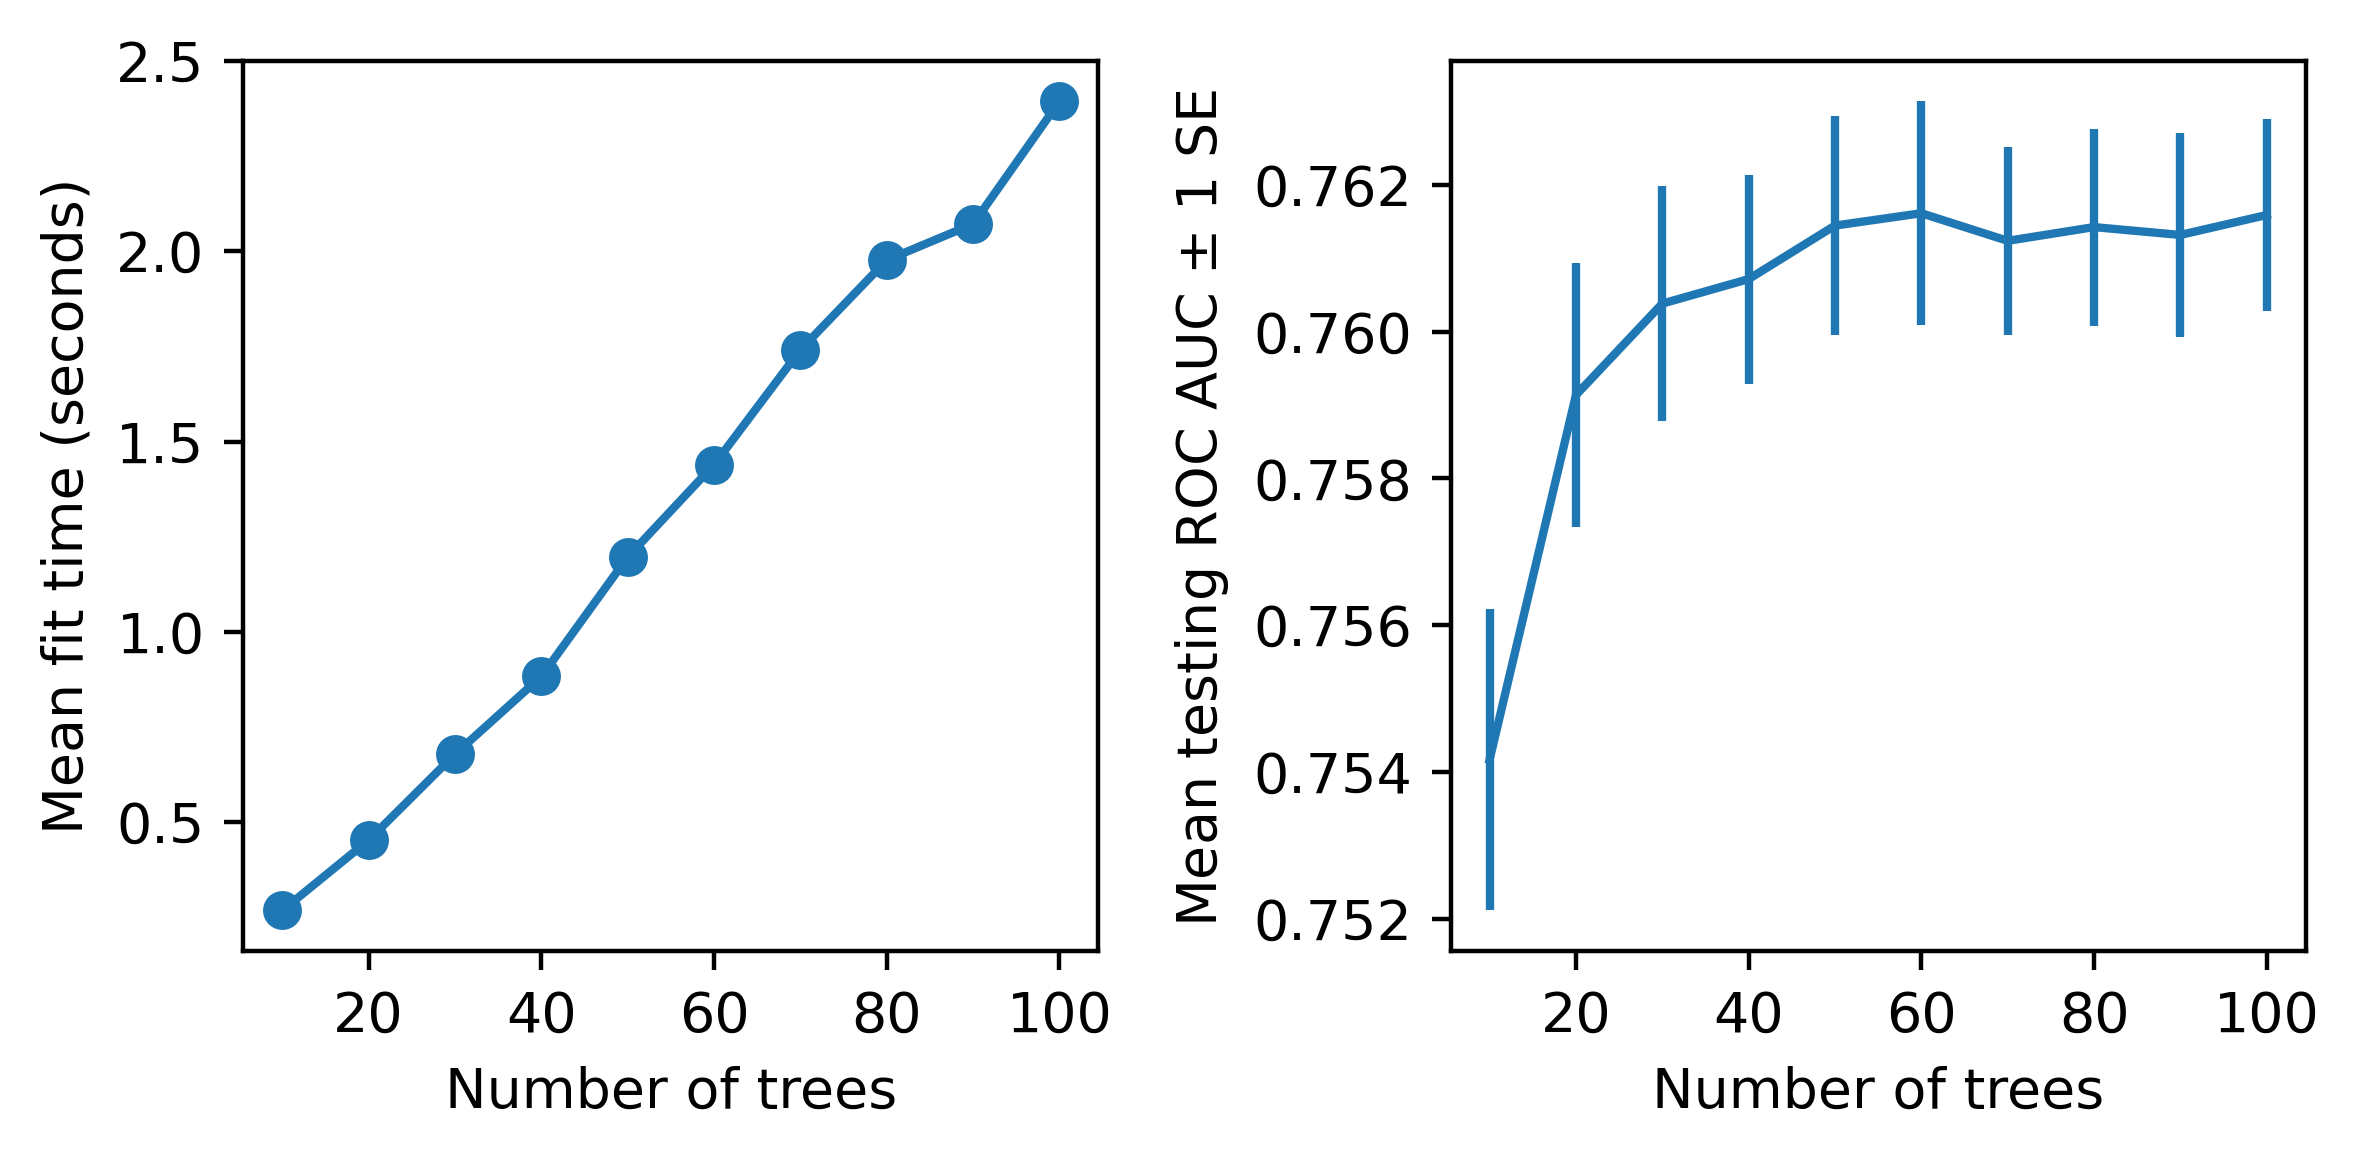

In [16]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_fit_time'],
'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_test_score'],
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()

### 5. Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham số tốt nhất

<Axes: >

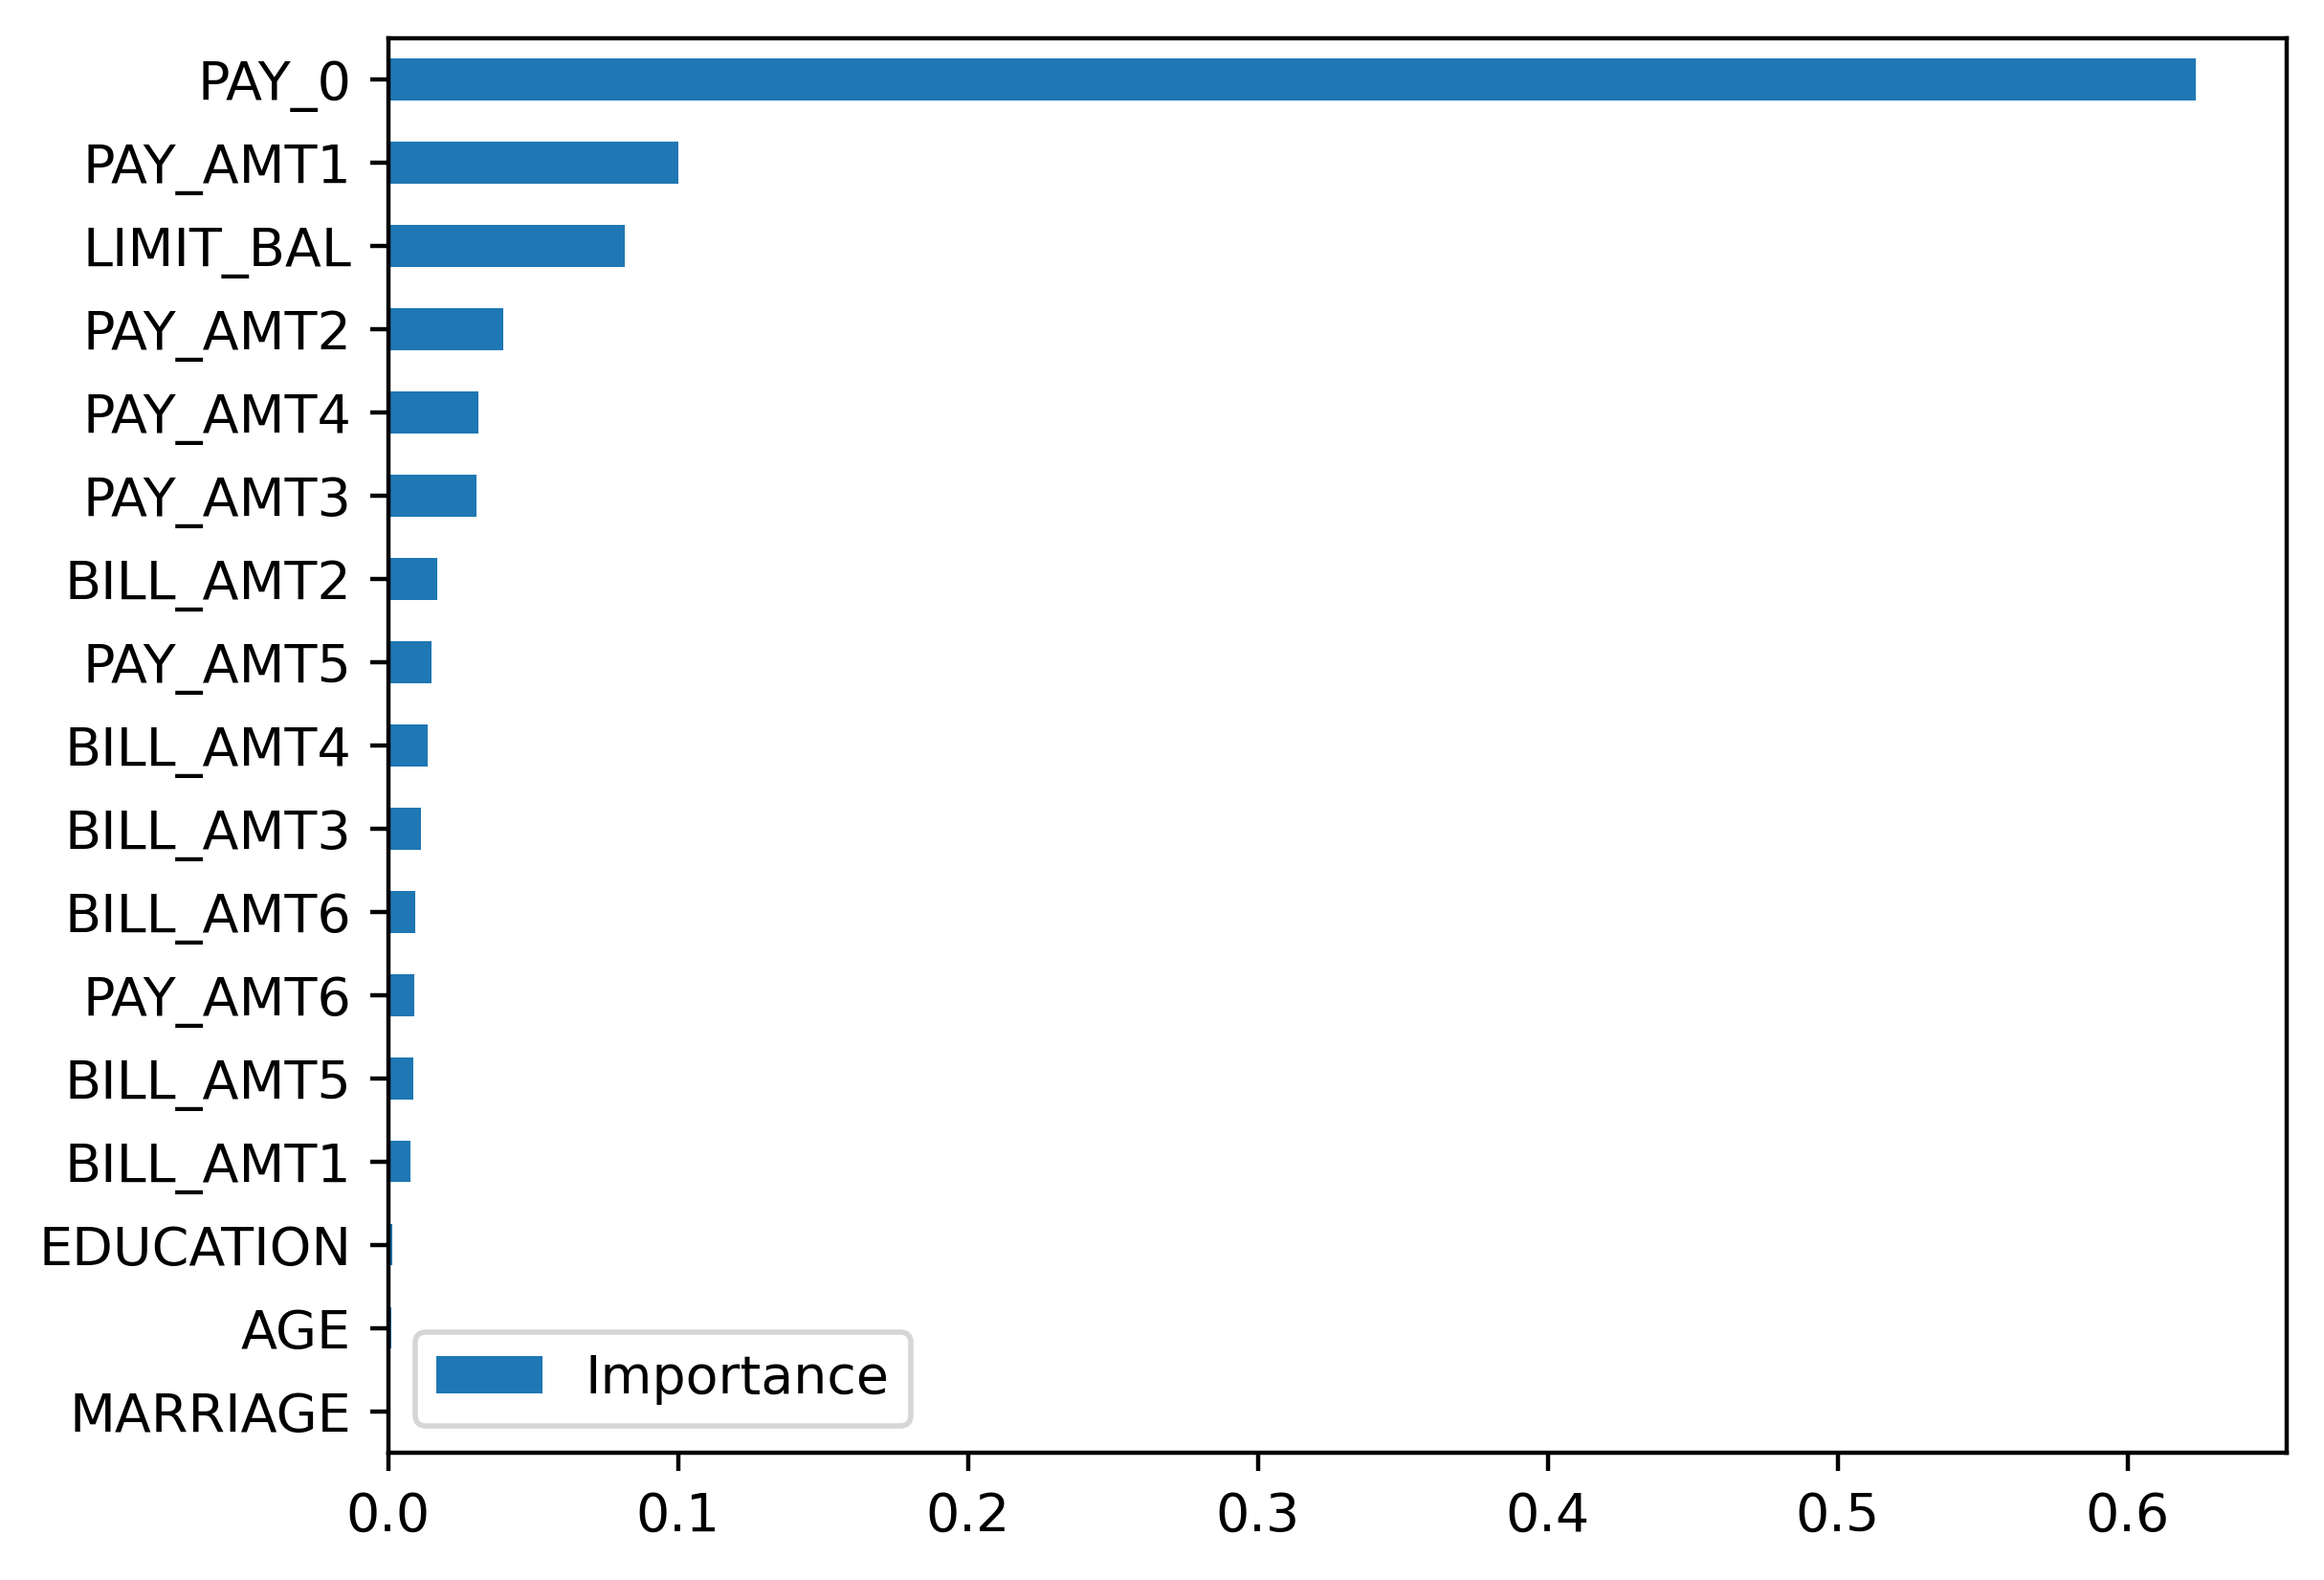

In [17]:
# {'n_estimators': 50}
cv_rf_ex.best_params_
# the feature names and importances
feat_imp_df = pd.DataFrame({
'Importance':cv_rf_ex.best_estimator_.feature_importances_},
index=features_response[:-1])
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()